# HAWC+ Data Analysis Techniques

In this jupyter cookbook, we will explore the [HAWC+](https://www.sofia.usra.edu/science/instruments/hawc) data cube and describe some of the basic analysis techniques involving imaging polarimetry data.

This cookbook follows the SOFIA press release of 30 Doradus observations: [SOFIA Reveals Never-Before-Seen Magnetic Field Details](https://www.sofia.usra.edu/multimedia/science-results-archive/sofia-reveals-never-seen-magnetic-field-details).

The Level 4 reduced data from this program has been released immediately to the public and is available on the [SOFIA Data Cycle System (DCS)](https://dcs.sofia.usra.edu/).  This notebook will guide the reader through downloading the 30 Doradus data with a walkthrough of basic analysis techniques with `python`.

# Downloading HAWC+ Data

- If you do not yet have a DCS account, register for one at [https://dcs.sofia.usra.edu/userSupport/registration.jsp](https://dcs.sofia.usra.edu/userSupport/registration.jsp)
- Log into DCS: [https://dcs.sofia.usra.edu](https://dcs.sofia.usra.edu)
- Go to [Search Science Archive](https://dcs.sofia.usra.edu/dataRetrieval/SearchScienceArchiveInfoBasic.jsp)
- Fill in:
  - Instrument: `HAWC_PLUS` from drop-down menu
  - Processing State: `LEVEL_4` from drop-down menu
  - Target: 30Dor
  - Click the `SIMBAD Position` button
  - Change `Spatial Search Radius` to `600` arcsec
  - Click the `Submit` button
- After the results load, select the checkboxes next to each of the six rows of the table.
- Click `Get Selected Data in Current Page`
- Click `Request Data Bundle`
- After a few minutes, an email with a download link will be sent to the email address associated with your DCS account.
- For more information, consult the HAWC+ Data Handbook accessible at [https://www.sofia.usra.edu/science/proposing-and-observing/data-products/data-resources](https://www.sofia.usra.edu/science/proposing-and-observing/data-products/data-resources)

# SOFIA Data Organization
After downloading the SOFIA DCS bundle to your working directory you will want to unzip it, which will produce a directory structure like this:

```console
.
└── sofia_data
    ├── level4
    │   └── p5813
    │       └── F0484_HA_POL_7600018_HAWCHWPC_PMP_022-114.fits
    └── missions
        ├── 2018-07-05_HA_F481
        │   └── p5827
        │       └── F0481_HA_POL_7600012_HAWDHWPD_PMP_050-083.fits
        ├── 2018-07-07_HA_F483
        │   └── p5646
        │       └── F0483_HA_POL_7600014_HAWCHWPC_PMP_022-065.fits
        ├── 2018-07-11_HA_F484
        │   └── p5648
        │       └── F0484_HA_POL_7600017_HAWCHWPC_PMP_065-114.fits
        └── 2018-07-12_HA_F485
            └── p5658
                ├── g1
                │   └── F0485_HA_POL_76000110_HAWAHWPA_PMP_043-052.fits
                └── g2
                    └── F0485_HA_POL_7600019_HAWEHWPE_PMP_055-075.fits
```

Note that each file represents observations with a different filter.  However, two observations were made with the same filter (HAWC C, $89\,\mathrm{\mu m}$).  These files, `F0483_HA_POL_7600014_HAWCHWPC_PMP_022-065.fits` and `F0484_HA_POL_7600017_HAWCHWPC_PMP_065-114.fits`, were combined into one: `level4->p5813->F0484_HA_POL_7600018_HAWCHWPC_PMP_022-114.fits`.

You can choose to keep the `fits` files nested, or copy them into one directory.

For the purpose of this basic analysis, though, let us dump all the files into one `sofia_data` directory:

```console
.
└── sofia_data
    ├── F0481_HA_POL_7600012_HAWDHWPD_PMP_050-083.fits
    ├── F0483_HA_POL_7600014_HAWCHWPC_PMP_022-065.fits
    ├── F0484_HA_POL_7600017_HAWCHWPC_PMP_065-114.fits
    ├── F0484_HA_POL_7600018_HAWCHWPC_PMP_022-114.fits
    ├── F0485_HA_POL_76000110_HAWAHWPA_PMP_043-052.fits
    └── F0485_HA_POL_7600019_HAWEHWPE_PMP_055-075.fits
```

# Data Structure

For this analysis, we require the standard [numpy/scipy/matplotlib stack](https://scipy.org/install.html) as well the [astropy](http://docs.astropy.org/en/stable/) and [aplpy](https://aplpy.readthedocs.io/en/stable/index.html) modules.

With just a few lines of code, we can explore the HAWC+ `fits` data cubes and plot the images.

In [1]:
from astropy.io import fits

efile = 'sofia_data/F0485_HA_POL_7600019_HAWEHWPE_PMP_055-075.fits'
dfile = 'sofia_data/F0481_HA_POL_7600012_HAWDHWPD_PMP_050-083.fits'
cfile = 'sofia_data/F0484_HA_POL_7600018_HAWCHWPC_PMP_022-114.fits'


afile = 'sofia_data/F0485_HA_POL_76000110_HAWAHWPA_PMP_043-052.fits'
hawc = fits.open(afile)
hawc.info()

Filename: sofia_data/F0485_HA_POL_76000110_HAWAHWPA_PMP_043-052.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  STOKES I      1 PrimaryHDU     572   (94, 114)   float64   
  1  ERROR I       1 ImageHDU        27   (94, 114)   float64   
  2  STOKES Q      1 ImageHDU        18   (94, 114)   float64   
  3  ERROR Q       1 ImageHDU        18   (94, 114)   float64   
  4  STOKES U      1 ImageHDU        18   (94, 114)   float64   
  5  ERROR U       1 ImageHDU        18   (94, 114)   float64   
  6  IMAGE MASK    1 ImageHDU        27   (94, 114)   float64   
  7  PERCENT POL    1 ImageHDU        18   (94, 114)   float64   
  8  DEBIASED PERCENT POL    1 ImageHDU        18   (94, 114)   float64   
  9  ERROR PERCENT POL    1 ImageHDU        18   (94, 114)   float64   
 10  POL ANGLE     1 ImageHDU        18   (94, 114)   float64   
 11  ROTATED POL ANGLE    1 ImageHDU        18   (94, 114)   float64   
 12  ERROR POL ANGLE    1 ImageHDU        18   (94, 114)   float

We can see above the data structure of the multi-extension `fits` files.  Each file contains 19 extensions which encapsulates all of the Stokes parameters in a single package.

## Stokes I
Stokes $I$---the zeroth extension in the `fits` file---represents the total intensity of the image, where $I^2 = Q^2 + U^2$.


Let us go ahead and plot this extension:

/home/gordon/miniconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  obj_type='module')


<IPython.core.display.Javascript object>


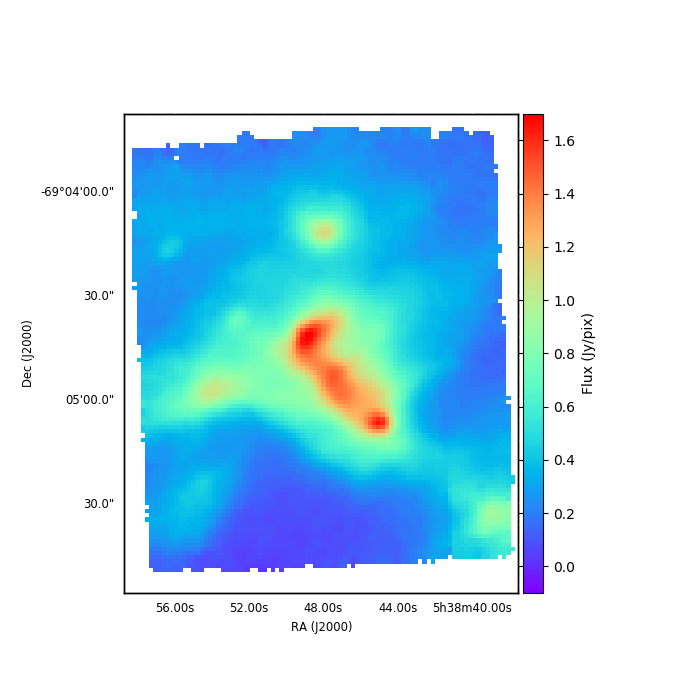

INFO: Auto-setting vmin to -9.832e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.698e+00 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
# ^jupyter magic for inline plots
from aplpy import FITSFigure

# set colormap for all plots
cmap = 'rainbow'

stokes_i = hawc['STOKES I']               # or hawc[0]. Note the extension is from the hawc.info() table above

fig = plt.figure(figsize=(7,7))

axs = FITSFigure(stokes_i, figure=fig)    # load HDU into aplpy figure
axs.show_colorscale(cmap=cmap)            # display the data with WCS projection and chosen colormap

# FORMATTING
axs.set_tick_labels_font(size='small')
axs.set_axis_labels_font(size='small')

# Add colorbar
axs.add_colorbar()
axs.colorbar.set_axis_label_text('Flux (Jy/pix)')

## Stokes Q and U
Similarly, we can plot the Stokes Q and Stokes U images:

<IPython.core.display.Javascript object>


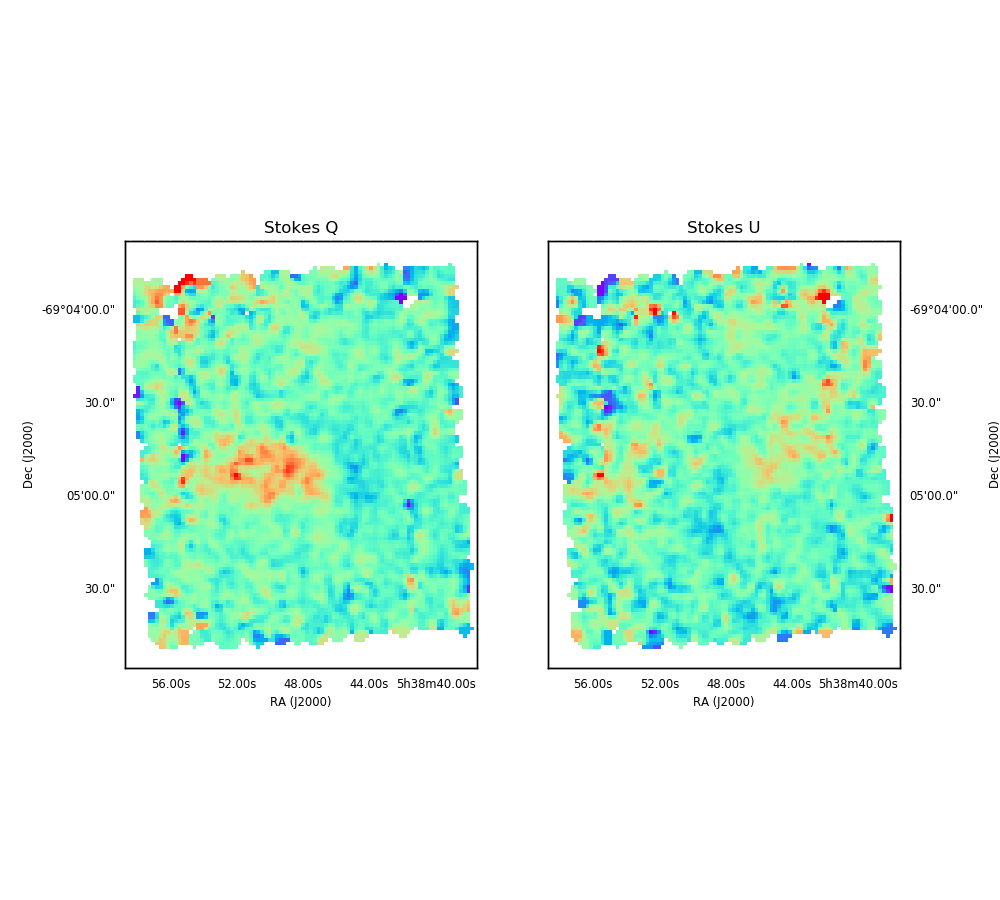

INFO: Auto-setting vmin to -6.959e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.873e-02 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to -6.281e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.749e-02 [aplpy.core]


In [3]:
stokes_q = hawc['STOKES Q']
stokes_u = hawc['STOKES U']

axq = FITSFigure(stokes_q, subplot=(1,2,1))  # generate FITSFigure as subplot to have two axes together
axq.show_colorscale(cmap=cmap)               # show Q


axu = FITSFigure(stokes_u, subplot=(1,2,2),
                 figure=plt.gcf())
axu.show_colorscale(cmap=cmap)               # show U

# FORMATTING
axq.set_title('Stokes Q')
axu.set_title('Stokes U')
#axu.axis_labels.hide_y()                     # hide axis ticklabels for U figure
#axu.tick_labels.hide_y()
axu.axis_labels.set_yposition('right')
axu.tick_labels.set_yposition('right')
axq.set_tick_labels_font(size='small')
axq.set_axis_labels_font(size='small')
axu.set_tick_labels_font(size='small')
axu.set_axis_labels_font(size='small')

We can additionally plot the associated error maps for each extension.

<IPython.core.display.Javascript object>


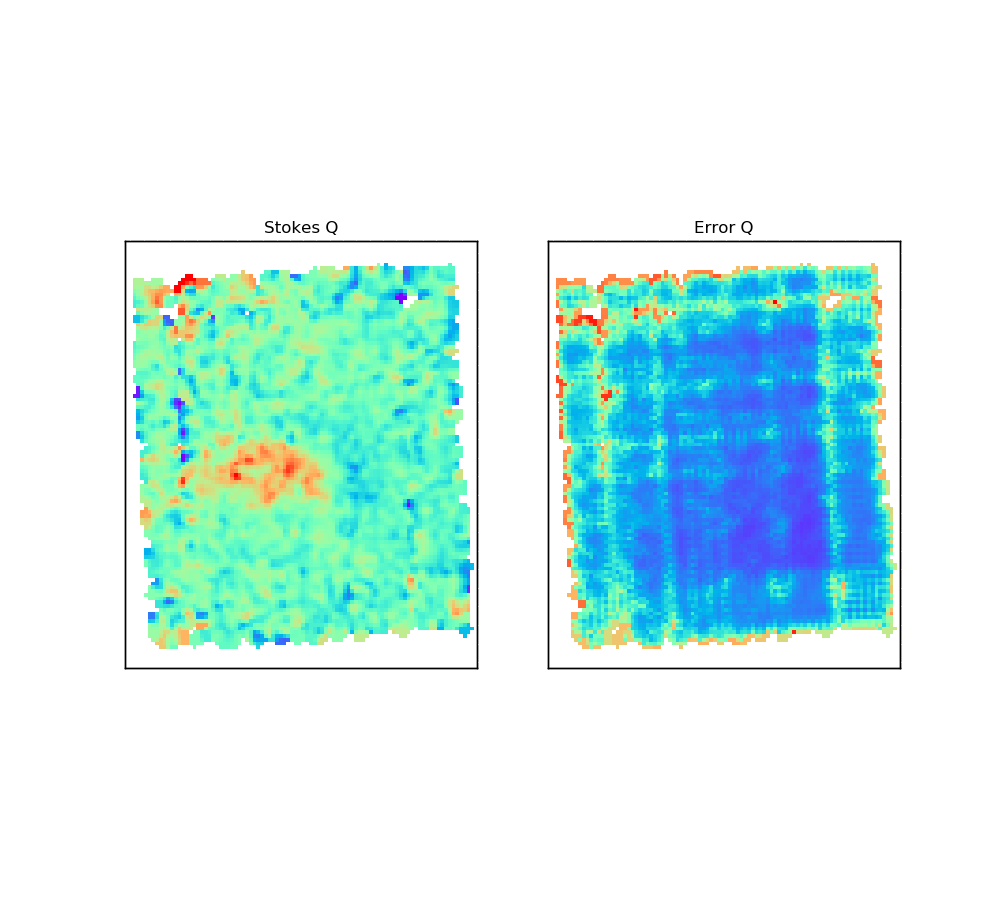

INFO: Auto-setting vmin to -6.959e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.873e-02 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to  3.739e-03 [aplpy.core]
INFO: Auto-setting vmax to  3.337e-02 [aplpy.core]


In [4]:
stokes_q = hawc['STOKES Q']
error_q = hawc['ERROR Q']

axq = FITSFigure(stokes_q, subplot=(1,2,1))  # generate FITSFigure as subplot to have two axes together
axq.show_colorscale(cmap=cmap)               # show Q


axe = FITSFigure(error_q, subplot=(1,2,2), figure=plt.gcf())
axe.show_colorscale(cmap=cmap)               # show error

# FORMATTING
axq.set_title('Stokes Q')
axe.set_title('Error Q')
axq.axis_labels.hide()                       # hide axis/tick labels
axe.axis_labels.hide()
axq.tick_labels.hide()
axe.tick_labels.hide()

## Polarized Intensity $I_p$
Level 4 HAWC+ additionally provides extensions with the polarization percentage ($p$), angle ($\theta$), and their associated errors ($\sigma$).

Percent polarization ($p$) and error ($\sigma_p$) are calculated as:

$p = 100\sqrt{\left(\frac{Q}{I}\right)^2+\left(\frac{U}{I}\right)^2}$

$\sigma_p = \frac{100}{I}\sqrt{\frac{1}{(Q^2+U^2)}\left[(Q\,\sigma_Q)^2+(U\,\sigma_U)^2+2QU\,\sigma_{QU}\right]+\left[\left(\frac{Q}{I}\right)^2+\left(\frac{U}{I}\right)^2\right]\sigma_I^2-2\frac{Q}{I}\sigma_{QI}-2\frac{U}{I}\sigma_{UI}}$ .

Note that $p$ here represents the **percent** polarization as opposed to the more typical convention for $p$ as the **fractional** polarization.

Maps of these data are found in extensions 7 (PERCENT POL) and 9 (ERROR PERCENT POL).

Polarized intensity, $I_p$, can then be calculated as $I_p = \frac{I\times p}{100}$, which is included in extension 13 (POL FLUX).

Also included is the debiased polarization percentage ($p^\prime$) calculated as:

$p^\prime=\sqrt{p^2-\sigma_p^2}$, found in extension 8 (DEBIASED PERCENT POL).

We similarly define the debiased polarized intensity as $I_{p^\prime} = \frac{I\times p^\prime}{100}$, which is included in extension 15 (DEBIASED POL FLUX).

<IPython.core.display.Javascript object>


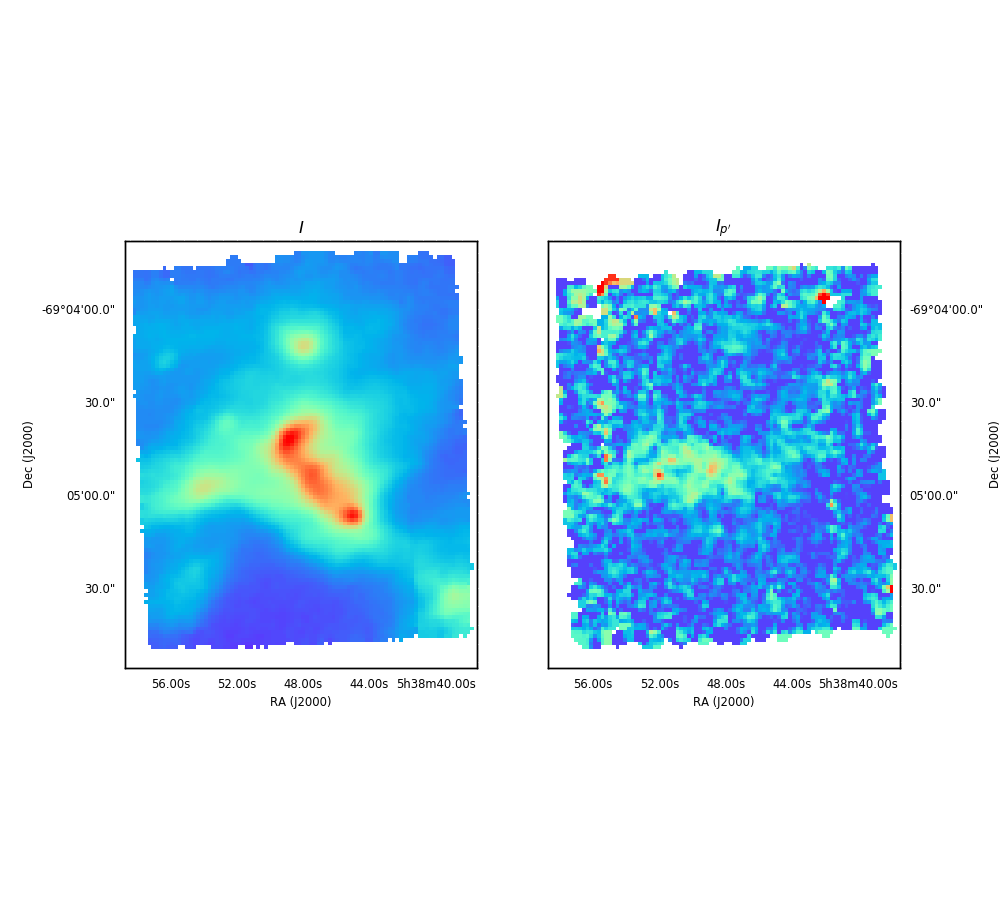

INFO: Auto-setting vmin to -9.832e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.698e+00 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to -9.530e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.058e-01 [aplpy.core]


In [5]:
stokes_ip = hawc['DEBIASED POL FLUX']

axi = FITSFigure(stokes_i, subplot=(1,2,1))
axi.show_colorscale(cmap=cmap)               # show I


axp = FITSFigure(stokes_ip, subplot=(1,2,2), figure=plt.gcf())
axp.show_colorscale(cmap=cmap)               # show Ip

# FORMATTING
axi.set_title(r'$I$')
axp.set_title(r'$I_{p^\prime}$')
#axi.axis_labels.hide()                       # hide axis/tick labels
#axp.axis_labels.hide()
#axi.tick_labels.hide()
#axp.tick_labels.hide()
axp.axis_labels.set_yposition('right')
axp.tick_labels.set_yposition('right')
axi.set_tick_labels_font(size='small')
axi.set_axis_labels_font(size='small')
axp.set_tick_labels_font(size='small')
axp.set_axis_labels_font(size='small')

# Plotting Polarization Vectors

From the $Q$ and $U$ maps, the polarization angle $\theta$ is calculated in the standard way:

$\theta = \frac{90}{\pi}\,\mathrm{tan^{-1}}\left(\frac{U}{Q}\right)$

with associated error:

$\sigma_\theta = \frac{90}{\pi\left(Q^2+U^2\right)}\sqrt{\left(Q\sigma_Q\right)^2+\left(U\sigma_U\right)^2-2QU\sigma_{QU}}$

The angle map is stored in extension 10 (POL ANGLE), with its error in extension 12 (ERROR POL ANGLE).  

However, these angles are relative to detector coordinates.  The angle we are more interested in is the angle on the sky.  As part of the HAWC+ reduction pipeline, $\theta$ is corrected for the vertical position angle of the instrument on the sky, the angle of the HWP plate, as well as an offset angle that is calibrated to each filter configuration.  This correction angle is applied to $\theta\rightarrow\theta^\prime$ and is saved to extension 11 (ROTATED POL ANGLE).  This also affects the Stokes $Q$ and $U$ parameters, and so this factor has already been rolled into the STOKES Q and STOKES U extensions (and their corresponding error maps) in the HAWC+ data cube.

We can now use the $p^\prime$ and $\theta^\prime$ maps to plot the polarization vectors.  First, however, let us make a quality cut.  Rather than defining a $\sigma$ cut on the polarization vectors themselves, it is more useful to define a signal-to-noise cut on total intensity, $I$, the measured the quantity.

Returning to the definition of $p$ for the moment:

$p = \frac{100\sqrt{Q^2+U^2}}{I}$

Let's assume the errors in $Q$ and $U$ are comparable such that there are no covariant (cross) terms in the error expansion.  Essentially, we define a quantity $x\equiv\sqrt{Q^2+U^2}$ so that:

\begin{align}
    p & = \frac{100\sqrt{Q^2+U^2}}{I} = \frac{x}{I} \\
    \left(\frac{\sigma_p}{p}\right)^2 & = \left(\frac{\sigma_x}{x}\right)^2 + \left(\frac{\sigma_I}{I}\right)^2
\end{align}

If $p\sim 1\%\times I$, then

\begin{align}
    p & = 0.01 = \frac{x}{I} \\
    x & = 0.01\,I \\
    \sigma_x & = 0.01\,\sigma_I
\end{align}
    
\begin{equation*}
    \Rightarrow\frac{\sigma_x}{x} = \frac{\sigma_I}{I}
\end{equation*}

Therefore,
\begin{equation*}
    \left(\frac{\sigma_p}{p}\right)^2 \sim 2\,\left(\frac{\sigma_I}{I}\right)^2
\end{equation*}
Inverting this, where $\frac{\sigma_x}{x}$ is the S/N of that quantity,
\begin{align*}
    \left(\mathrm{S/N}\right)_p & \sim \frac{1}{\sqrt{2}}\,\left(\mathrm{S/N}\right)_I \\
    \left(\mathrm{S/N}\right)_I & \sim \sqrt{2}\left(\mathrm{S/N}\right)_p \\
    & \sim \sqrt{2}\left(\frac{p}{\sigma_p}\right)
\end{align*}

One way to think about how to proceed from here is to ask, if a fractional polarization is measured $\sim1\%$, what is the maximum error we would tolerate in that quantity? For an error of $0.5\%$ we have:
\begin{align}
    \left(\mathrm{S/N}\right)_I & \sim \sqrt{2}\left(\frac{p}{\sigma_p}\right) \sim \sqrt{2}\frac{1}{0.5\%} \\
    & \sim \frac{\sqrt{2}}{0.005} \sim 283
\end{align}

So, therefore if we desire an accuracy of $\sigma_p\sim0.5\%$, we require a S/N in total intensity $I$ of $\sim283$. 

We perform the following steps:
1.  use the Stokes $I$ image as the background for the vector plot
2.  perform a quality cut on Stokes $I/\sigma_I > 100$ to make a mask
3.  mask out low S/N vectors
4.  plot remaining polarization vectors
5.  add contours to better visualize changes in flux across the map

In [6]:
from astropy.io import fits
import numpy as np
from aplpy import FITSFigure

def make_polmap(filename, title=None, figure=None, subplot=(1,1,1)):
    hawc = fits.open(filename)
    p = hawc['DEBIASED PERCENT POL']    # %
    theta = hawc['ROTATED POL ANGLE']   # deg
    stokes_i = hawc['STOKES I']         # I
    error_i = hawc['ERROR I']           # error I

    # 1. plot Stokes I
    #  convert from Jy/pix to Jy/sq. arcsec
    pxscale = stokes_i.header['CDELT2']*3600  # map scale in arcsec/pix
    stokes_i.data /= pxscale**2
    error_i.data /= pxscale**2

    fig = FITSFigure(stokes_i, figure=figure, subplot=subplot)

    # 2. perform S/N cut on I/\sigma_I
    err_lim = 100
    mask = np.where(stokes_i.data/error_i.data < err_lim)

    # 3. mask out low S/N vectors by setting masked indices to NaN
    p.data[mask] = np.nan

    # 4. plot vectors
    scalevec = 0.4  # 1pix = scalevec * 1% pol          # scale vectors to make it easier to see 
    fig.show_vectors(p, theta, scale=scalevec, step=2)  # step size = display every 'step' vectors
                                                        #   step size of 2 is effectively Nyquist sampling
                                                        #   --close to the beam size

    # 5. plot contours
    ncontours = 30
    fig.show_contour(stokes_i, cmap=cmap, levels=ncontours,
                     filled=True, smooth=1, kernel='box')
    fig.show_contour(stokes_i, colors='gray', levels=ncontours,
                     smooth=1, kernel='box', linewidths=0.3)

    # Show image
    fig.show_colorscale(cmap=cmap)
    
    # If title, set it
    if title:
        fig.set_title(title)

    # Add colorbar
    fig.add_colorbar()
    fig.colorbar.set_axis_label_text('Flux (Jy/arcsec$^2$)')

    # Add beam indicator
    fig.add_beam(facecolor='red', edgecolor='black',
                 linewidth=2, pad=1, corner='bottom left')
    fig.add_label(0.02, 0.02, 'Beam FWHM',
                  horizontalalignment='left', weight='bold',
                  relative=True, size='small')

    # Add vector scale
    #   polarization vectors are displayed such that 'scalevec' * 1% pol is 1 pix long
    #   must translate pixel size to angular degrees since the 'add_scalebar' function assumes a physical scale
    vectscale = scalevec * pxscale/3600
    fig.add_scalebar(5 * vectscale, "p = 5%",corner='top right',frame=True)
    
    # FORMATTING
    fig.set_tick_labels_font(size='small')
    fig.set_axis_labels_font(size='small')
    
    return stokes_i, p, mask, fig

<IPython.core.display.Javascript object>


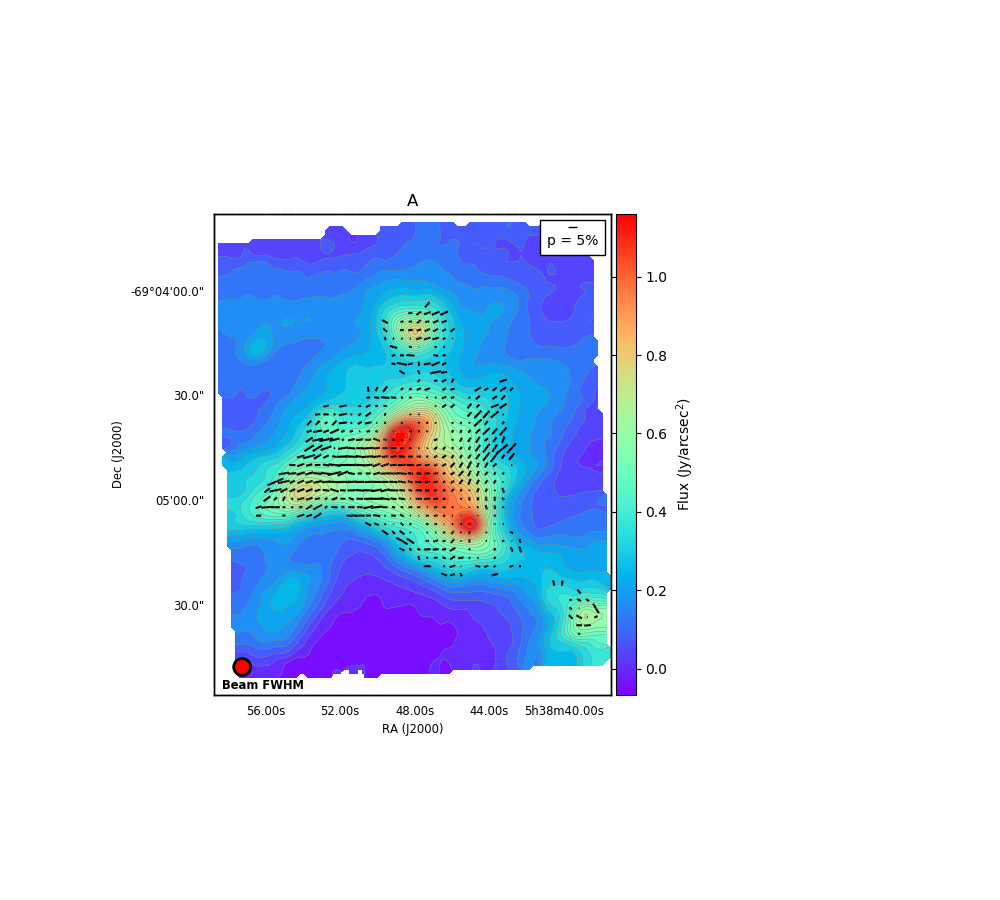

/home/gordon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


INFO: Auto-setting vmin to -6.715e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.160e+00 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


In [7]:
stokes_i, p, mask, fig = make_polmap(afile, title='A')

<IPython.core.display.Javascript object>


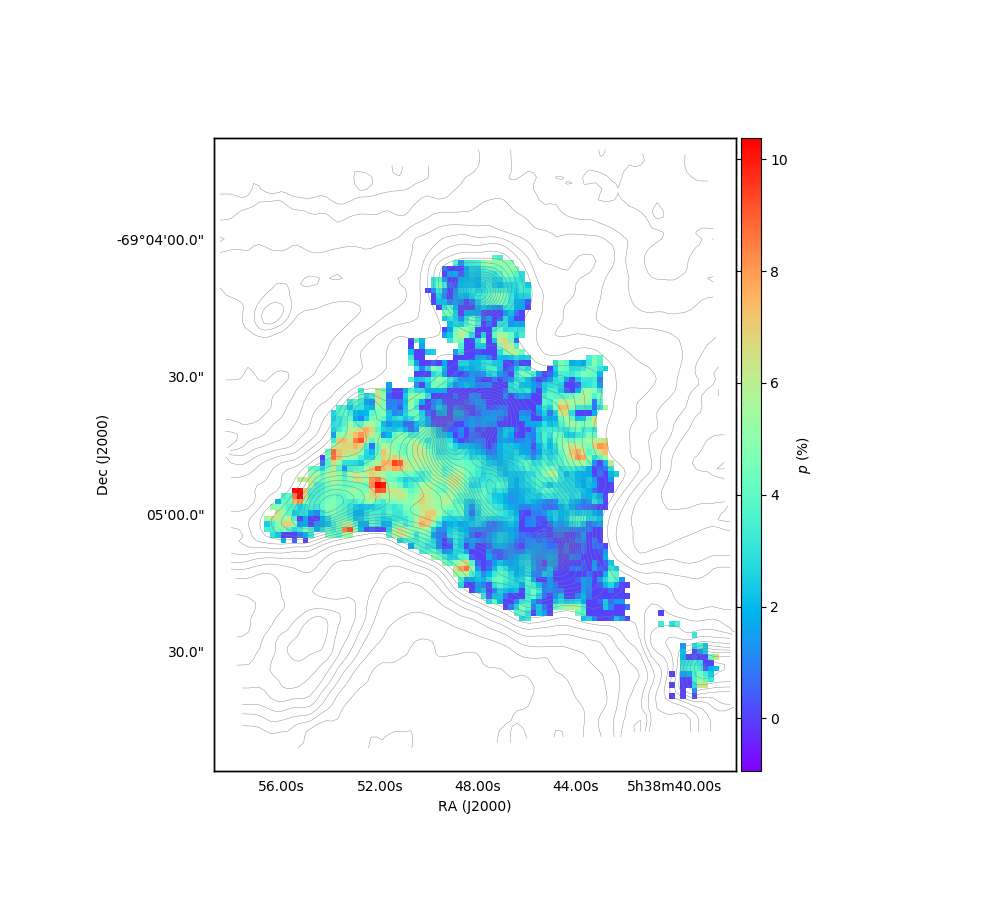

INFO: Auto-setting vmin to -9.345e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.037e+01 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


In [8]:
fig = FITSFigure(p)

# Show image
fig.show_colorscale(cmap=cmap)

# Plot contours
ncontours = 30
fig.show_contour(stokes_i, colors='gray', levels=ncontours,
                 smooth=1, kernel='box', linewidths=0.3)

# Add colorbar
fig.add_colorbar()
fig.colorbar.set_axis_label_text('$p$ (%)')

<IPython.core.display.Javascript object>


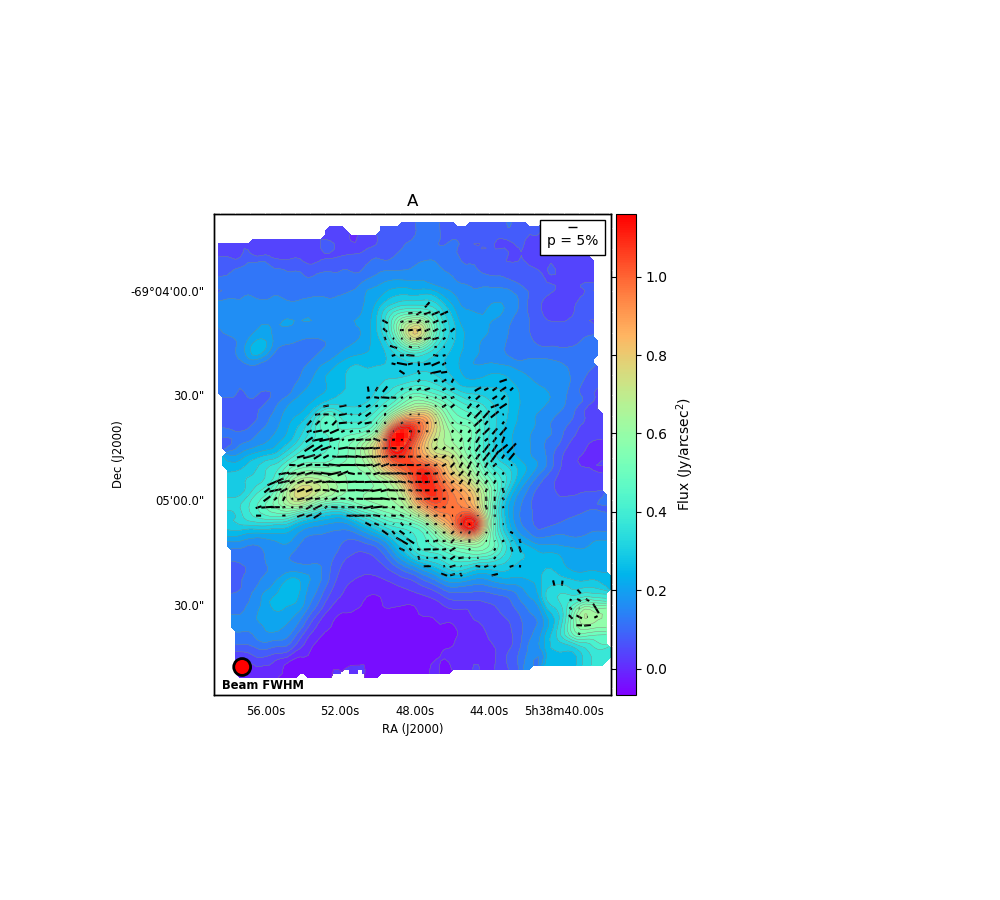

/home/gordon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


INFO: Auto-setting vmin to -6.715e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.160e+00 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


<IPython.core.display.Javascript object>


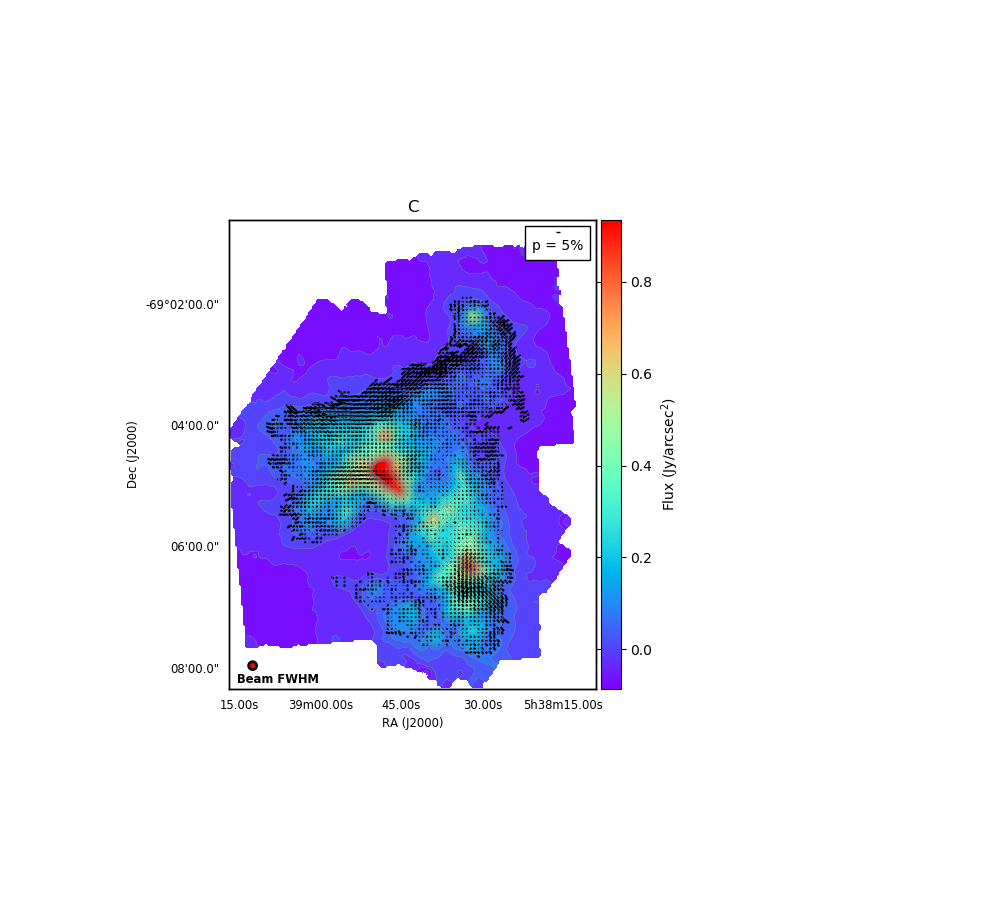

INFO: Auto-setting vmin to -8.639e-02 [aplpy.core]
INFO: Auto-setting vmax to  9.343e-01 [aplpy.core]


<IPython.core.display.Javascript object>


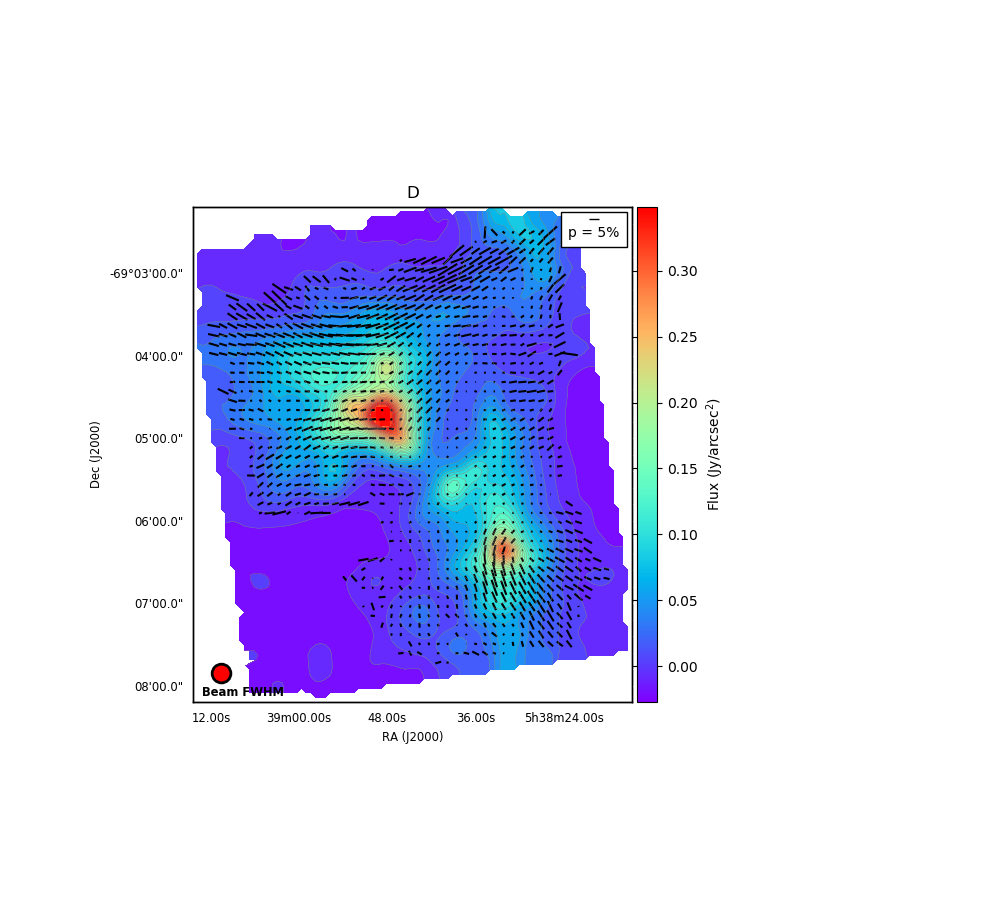

INFO: Auto-setting vmin to -2.750e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.486e-01 [aplpy.core]


<IPython.core.display.Javascript object>


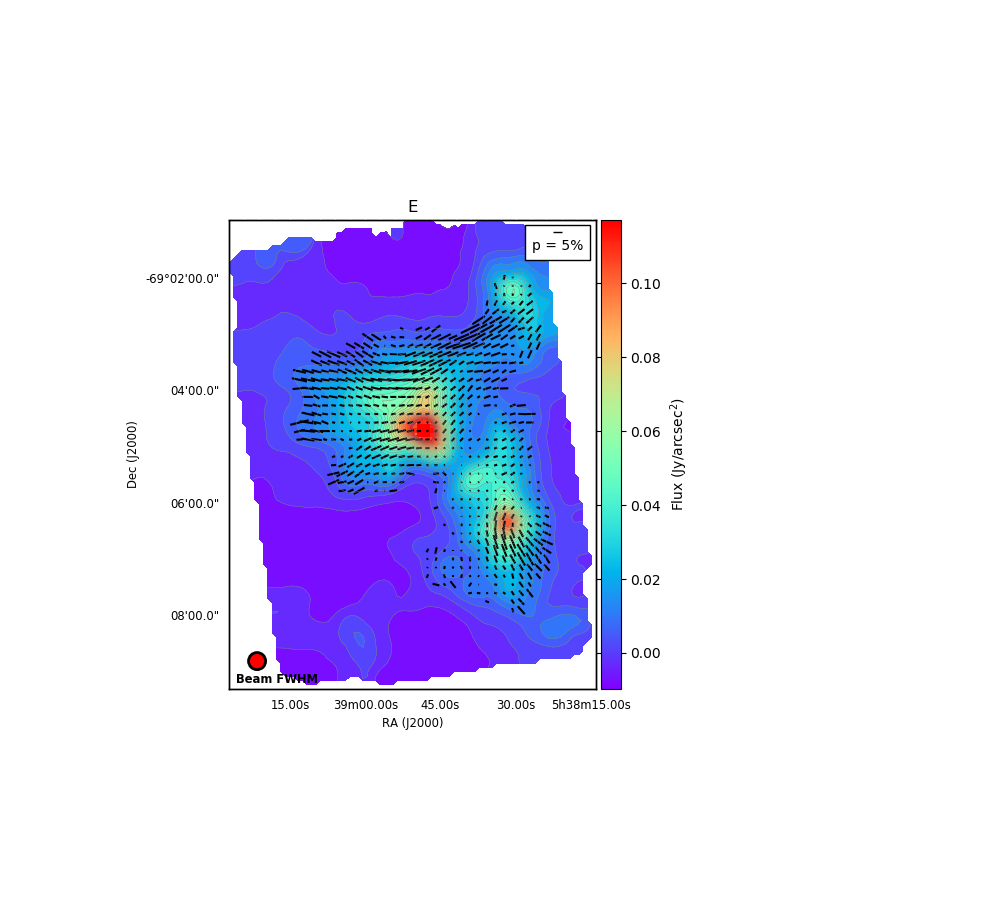

INFO: Auto-setting vmin to -9.768e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.171e-01 [aplpy.core]


In [9]:
files = [afile,cfile,dfile,efile]
titles = ['A','C','D','E']

for file, title in zip(files,titles):
    make_polmap(file,title)

<IPython.core.display.Javascript object>


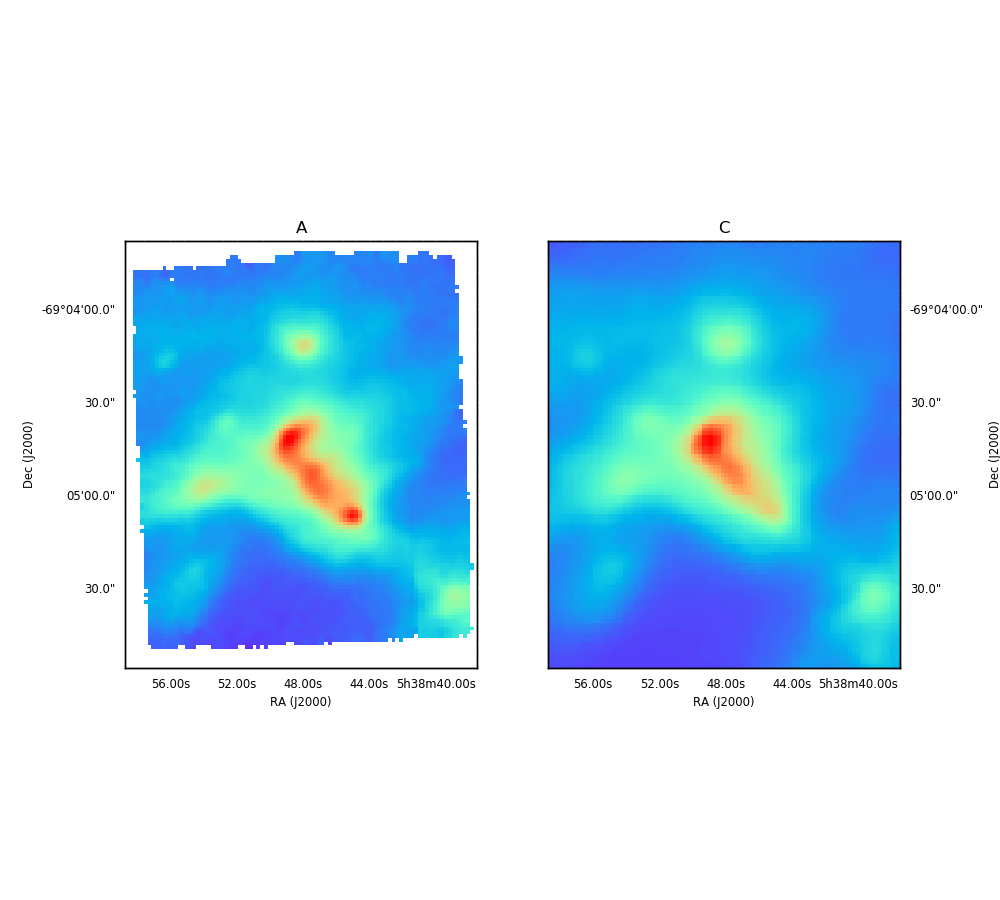

INFO: Auto-setting vmin to -9.832e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.698e+00 [aplpy.core]


/home/gordon/miniconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to -2.768e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.537e+00 [aplpy.core]


In [10]:
# reproject
from reproject import reproject_exact

a_orig = fits.open(afile)['STOKES I']
hawc_a_header = a_orig.header

new_c, footprint = reproject_exact(cfile,output_projection=hawc_a_header,hdu_in='STOKES I')

c_repr = fits.PrimaryHDU(new_c,header=hawc_a_header)

afig = FITSFigure(a_orig,subplot=(1,2,1))
afig.show_colorscale(cmap=cmap)

cfig = FITSFigure(c_repr, subplot=(1,2,2), figure=plt.gcf())
cfig.show_colorscale(cmap=cmap)

# FORMATTING
afig.set_title('A')
cfig.set_title('C')
cfig.axis_labels.set_yposition('right')
cfig.tick_labels.set_yposition('right')
afig.set_tick_labels_font(size='small')
afig.set_axis_labels_font(size='small')
cfig.set_tick_labels_font(size='small')
cfig.set_axis_labels_font(size='small')

<IPython.core.display.Javascript object>


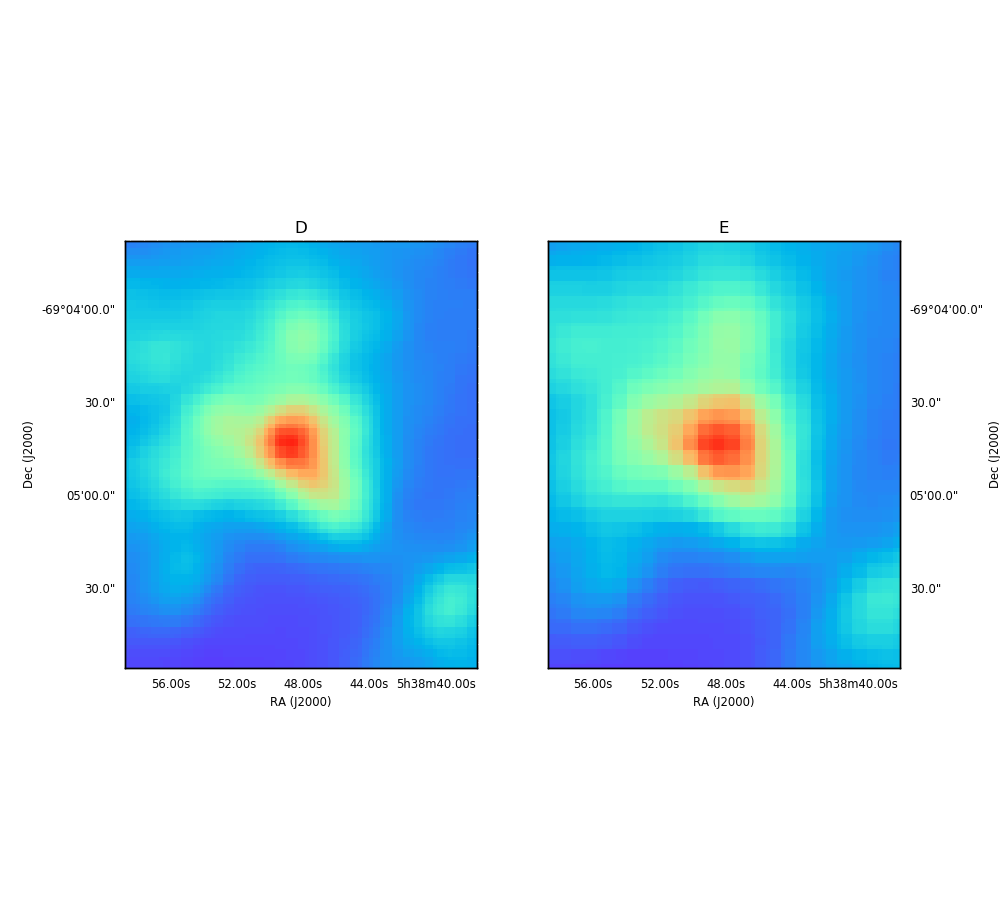

INFO: Auto-setting vmin to -2.677e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.697e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.495e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.876e+00 [aplpy.core]


In [11]:
new_d, footprint = reproject_exact(dfile,output_projection=hawc_a_header,hdu_in='STOKES I')
new_e, footprint = reproject_exact(efile,output_projection=hawc_a_header,hdu_in='STOKES I')

d_repr = fits.PrimaryHDU(new_d,header=hawc_a_header)
e_repr = fits.PrimaryHDU(new_e,header=hawc_a_header)

dfig = FITSFigure(d_repr, subplot=(1,2,1))
dfig.show_colorscale(cmap=cmap)

efig = FITSFigure(e_repr, subplot=(1,2,2),figure=plt.gcf())
efig.show_colorscale(cmap=cmap)

# FORMATTING
dfig.set_title('D')
efig.set_title('E')
efig.axis_labels.set_yposition('right')
efig.tick_labels.set_yposition('right')
dfig.set_tick_labels_font(size='small')
dfig.set_axis_labels_font(size='small')
efig.set_tick_labels_font(size='small')
efig.set_axis_labels_font(size='small')

# Temperature map

In this section, we demonstrate the use of `astropy` modeling to fit a graybody function through all four HAWC+ images. We define an emissivity function $\varepsilon_\lambda$ which we represent as a powerlaw with spectral index $\beta \leq 0$. This function then adds a wavelength-dependent scaling factor to the Planck function:
\begin{align}
    \varepsilon_\lambda & = \varepsilon_0\left(\frac{\lambda}{\lambda_0}\right)^{\beta} \\
    I_{\lambda,T} & = \varepsilon_\lambda\times B_{\lambda}(T)
\end{align}

Ideally, $\varepsilon$ would also have a temperature dependence, which we neglect for this model.  Note that for $\beta=0$ the wavelength-dependence disappears, and $I_{\lambda,T}$ is simply the Planck function (modulo some scaling factor $\varepsilon_0$ which we rope into a single scaling constant `bolometric_flux` in the following code).

In [12]:
from astropy.modeling.blackbody import blackbody_lambda
import astropy.units as u
import astropy.constants as const

# This is the actual graybody function.
#   The temperature and bolometric_flux parameters will be fit later.
def GrayBody(waves, temperature, bolometric_flux=1*u.erg/(u.s*u.cm**2), wave_0=53*u.micron, beta=-1.5):
    
    # fitting will wipe out units, so make sure they are attached
    waves = u.Quantity(waves,u.micron)
    temperature = u.Quantity(temperature,u.K)
    
    # Emissivity
    eps = (waves/wave_0)**beta

    # We normalize the returned blackbody so that the integral would be
    # unity, and we then multiply by the bolometric flux. A normalized
    # blackbody has f_lam = pi * B_nu / (sigma * T^4), which is what we
    # calculate here.
    bb = (np.pi * u.sr * blackbody_lambda(waves, temperature) /
          const.sigma_sb / temperature ** 4).to(1/u.AA)
    
    flambda = bolometric_flux * eps * bb
    
    # If the bolometric_flux parameter has no unit, we should drop the units
    # and return a unitless value. This occurs during fitting.
    if hasattr(bolometric_flux, 'unit'):
        return flambda
    else:
        return flambda.value

<IPython.core.display.Javascript object>


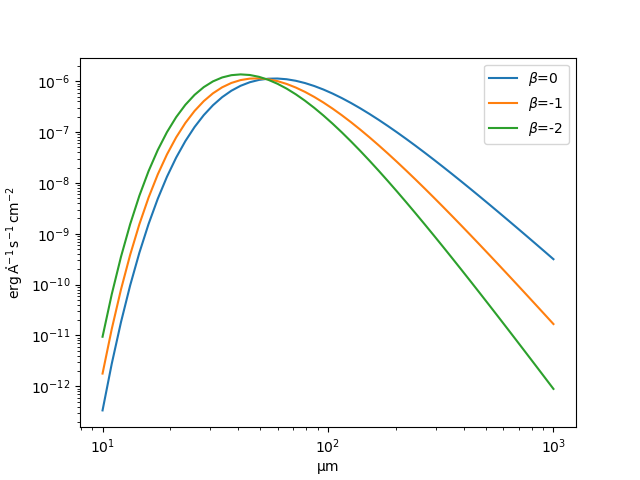

In [15]:
from astropy.visualization import quantity_support

# Generate a number of epsilon models with different beta values to visualize
#  Apply models to wavelengths and plot
waves = np.logspace(1,3)*u.micron

model0 = GrayBody(waves, 50*u.K, beta=0)
model1 = GrayBody(waves, 50*u.K, beta=-1)
model2 = GrayBody(waves, 50*u.K, beta=-2)

with quantity_support():
    plt.figure()
    plt.loglog(waves, model0, label=r'$\beta$=0')
    plt.loglog(waves, model1, label=r'$\beta$=-1')
    plt.loglog(waves, model2, label=r'$\beta$=-2')
    plt.legend()

For this demonstration, we generate an initial model with $\beta=-1.5$ and a blackbody temperature of 200 K.  The two fittable parameters for this model are the graybody temperature as well as the bolometric flux of the resulting spectral energy distribution.

In [14]:
from astropy.utils.console import ProgressBar
from scipy.optimize import curve_fit
from functools import partial

waves = [53, 89, 155, 216]*u.micron

# dataiter holds 4-tuples of each pixel in all 4 wavelengths
dataiter = list(zip(a_orig.data.flat,c_repr.data.flat,d_repr.data.flat,e_repr.data.flat))

#dataiter = dataiter.to(model_units,u.spectral_density(waves)).value

# This is the model with all the parameters except temp and bol_flux "frozen in"
gb_model = partial(GrayBody, wave_0=53*u.micron, beta=-1.5)

# This is the function that we apply to every pixel in the maps.
def fit_gb(y):
    # curve_fit doesn't like nans
    if any(np.isnan(y)):
        return np.nan
    bounds = ((0,0), (10000,np.inf))
    try:
        params,_ = curve_fit(GrayBody, waves, y,
                             p0=[100,1], bounds=bounds)
    except RuntimeError:
        return np.nan
    return params

results = ProgressBar.map(fit_gb,dataiter[3000:3010],
                          ipython_widget=True, multiprocess=True)


temps,_ = zip(*results)
print(temps)
#temps = np.array(temps).reshape(a_orig.data.shape)
#temps = fits.PrimaryHDU(temps,header=hawc_a_header)
#temps.writeto('temps_gray.fits',overwrite=True)

#temp,flux = fit_gb(dataiter[4500])
#wlen = np.logspace(1,3)*u.micron
#model = gb_model(wlen, temp*u.K, flux)
#print(temp,flux)
#plt.figure()
#with quantity_support():
#    plt.loglog(wlen,model)
    #plt.loglog(wlen,gb_model(wlen,200*u.K, 0.0000005*model_units))
#    plt.scatter(waves,dataiter[4500])

FloatProgress(value=0.0)

TypeError: zip argument #7 must support iteration